In [2]:
%pip install nltk

     |████████████████████████████████| 1.5 MB 423 kB/s 
     |████████████████████████████████| 285 kB 517 kB/s 
     |████████████████████████████████| 76 kB 455 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np
import pandas as pd

In [22]:
# get the data
yelp_df = pd.read_csv('yelp.csv')

In [23]:
yelp_df.head()


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [24]:
yelp_df.shape

(10000, 10)

In [25]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [26]:
len(yelp_df)

10000

In [27]:
yelp_df.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [28]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [36]:
# create a new column called text length
yelp_df['text length'] = yelp_df.text.apply(len)

In [38]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text column,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469,469


In [39]:
# exploratory data analysis

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

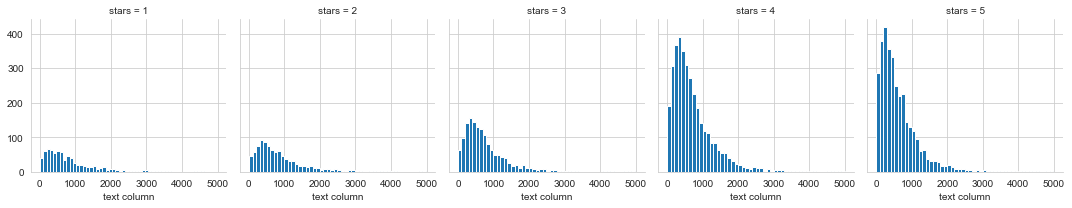

In [41]:
# use FacetGrid to create a grid of 5 histograms of text length based on star ratings:
g = sns.FacetGrid(yelp_df, col='stars')
g.map(plt.hist, 'text column', bins=50)

In [42]:
yelp_df.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'text column', 'text length'],
      dtype='object')

<AxesSubplot:xlabel='stars', ylabel='text length'>

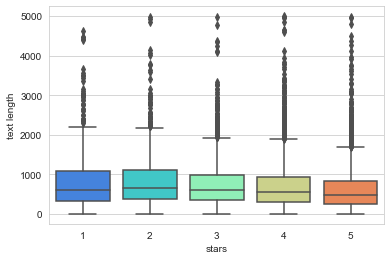

In [43]:
# create a boxplot of text length for each star category
sns.boxplot(x='stars',y='text length',data=yelp_df,palette='rainbow')

In [47]:
yelp_df.drop('text column',axis=1,inplace=True)

In [48]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


<AxesSubplot:xlabel='stars', ylabel='text length'>

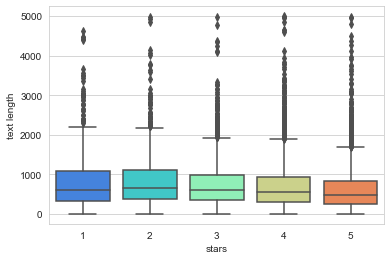

In [49]:
sns.boxplot(x='stars',y='text length',data=yelp_df,palette='rainbow')

<AxesSubplot:xlabel='stars', ylabel='count'>

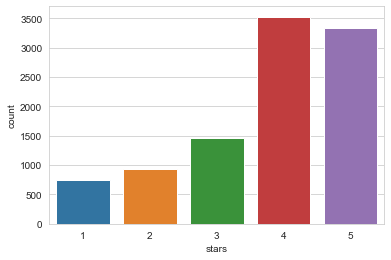

In [50]:
# create a countplot of the number of occurrences for each type of star rating
sns.countplot(x='stars',data=yelp_df)

In [51]:
# use groupby to get the mean values of the numerical columns
stars = yelp_df.groupby('stars').mean()

In [52]:
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [53]:
# use correlation
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

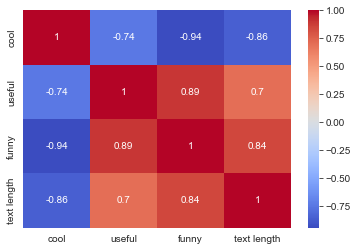

In [55]:
# now create a heatmap of the correlation matrix
sns.heatmap(stars.corr(), annot=True, cmap='coolwarm')

# NLP CLASSIFICATION TASK

In [57]:
# grab only reviews that were either 1 or 5 stars by creating a new dataframe
yelp_class = yelp_df[(yelp_df.stars==1)|(yelp_df.stars==5)]

In [58]:
# create two new objects x and y. 
x = yelp_class.text
y = yelp_class.stars

In [59]:
# import CountVectorizer and create an instance of it
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [60]:
# use the fit transform method and pass in the text column of the yelp_class dataframe
x = cv.fit_transform(x)

In [61]:
# perform a train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [62]:
# train a model using MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [63]:
nb.fit(x_train,y_train)

MultinomialNB()

In [64]:
# predictions and evaluations   
predictions = nb.predict(x_test)

In [65]:
# create a confusion matrix and a classification report
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [67]:
# what happens if we try to include TF-IDF to this process using a pipeline?
from sklearn.feature_extraction.text import TfidfTransformer

In [68]:
# import pipeline from sklearn
from sklearn.pipeline import Pipeline

In [69]:
pipeline = Pipeline([
    ('bow', CountVectorizer()), # strings to token integer counts
    ('tfidf', TfidfTransformer()), # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()), # train on TF-IDF vectors w/ Naive Bayes classifier
])

# USING THE PIPELINE

In [70]:
# perform a train test split
x = yelp_class.text
y = yelp_class.stars
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [71]:
# fit the pipeline to the training data
pipeline.fit(x_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [72]:
# predictions and evaluations
predictions = pipeline.predict(x_test)

In [73]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa